<a href="https://colab.research.google.com/github/vimalthomas-db/deeplearning/blob/main/train_mpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##############################################################################
#
# This python notebook downloads MPG data from UCIML repo and performs
# standardization, training, validation and testing data splits before using the
# manual MLP model to train to predict mile per gallon for the given classes.
#
#     02/25/2025
#     Vimal Thomas Joseph
#
# Initial Draft
#
#############################################################################


import math
!pip install ucimlrepo
!pip install scikit-learn

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

# Combine features and target into one DataFrame for easy filtering
data = pd.concat([X, y], axis=1)

# Drop rows where the target variable is NaN
cleaned_data = data.dropna()

# Split the data back into features (X) and target (y)
X = cleaned_data.iloc[:, :-1]
y = cleaned_data.iloc[:, -1]

# Display the number of rows removed
rows_removed = len(data) - len(cleaned_data)
print(f"Rows removed: {rows_removed}")

Rows removed: 6


In [3]:
from sklearn.model_selection import train_test_split

# Do a 70/30 split (e.g., 70% train, 30% other)
X_train, X_leftover, y_train, y_leftover = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    shuffle=True,
)

# Split the remaining 30% into validation/testing (15%/15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_leftover, y_leftover,
    test_size=0.5,
    random_state=42,
    shuffle=True,
)

# Compute statistics for X (features)
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

# Standardize X
X_train = (X_train - X_mean) / X_std
X_val = (X_val - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

# Compute statistics for y (targets)
y_mean = y_train.mean()
y_std = y_train.std()

# Standardize y
y_train = (y_train - y_mean) / y_std
y_val = (y_val - y_mean) / y_std
y_test = (y_test - y_mean) / y_std

In [4]:
#store the spilt data values in the train_x,train_y... for further steps.
train_x, train_y = X_train.values, y_train.values
val_x, val_y =     X_val.values, y_val.values
test_x, test_y =   X_test.values, y_test.values

train_y = train_y.reshape(-1, 1)
val_y = val_y.reshape(-1, 1)
test_y = test_y.reshape(-1, 1)

#print the initial shapes.
print(train_x.shape, train_y.shape)
print(val_x.shape, val_y.shape)
print(test_x.shape, test_y.shape)

(274, 7) (274, 1)
(59, 7) (59, 1)
(59, 7) (59, 1)


In [35]:
# Download the MLP model stored in github.

!git clone https://github.com/vimalthomas-db/deeplearning.git
%cd deeplearning/

%run "Multilayerperceptron_drop.ipynb"

Cloning into 'deeplearning'...
remote: Enumerating objects: 174, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 174 (delta 21), reused 2 (delta 2), pack-reused 134 (from 1)
Receiving objects: 100% (174/174), 1.00 MiB | 8.49 MiB/s, done.
Resolving deltas: 100% (104/104), done.
/content/deeplearning/deeplearning/deeplearning


In [6]:
import numpy as np

#this is an additional block we used for testing to bring out best possible combination of learning rates, bacth sizes and epoch limits.

# Define the hyperparameters
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128]
epochs_list = [1000, 2000, 3000]

# Store results
results = []

# Iterate through hyperparameter combinations
for lr in learning_rates:
    for batch_size in batch_sizes:
        for epochs in epochs_list:
            # Initialize the MLP
            mlp = MultilayerPerceptron([
                Layer(train_x.shape[1], 256, Relu(), dropout_rate=0.00),
                Layer(256, 128, Relu(), dropout_rate=0.00),
                Layer(128, 64, Relu(), dropout_rate=0.00),
                Layer(64, 64, Relu(), dropout_rate=0.00),
                Layer(64, 1, Linear())
            ])

            loss_function = SquaredError()

            # Train the model
            train_losses, val_losses = mlp.train(
                train_x=train_x, train_y=train_y,
                val_x=val_x, val_y=val_y,
                loss_func=loss_function,
                learning_rate=lr, batch_size=batch_size, epochs=epochs, model_type='regression', RMSProp=True
            )

            # Store the results
            results.append({
                'learning_rate': lr,
                'batch_size': batch_size,
                'epochs': epochs,
                'train_loss': train_losses[-1],
                'val_loss': val_losses[-1]
            })

# Display the results
for result in results:
    print(result)

Streaming output truncated to the last 5000 lines.
Epoch 28/2000 - Training MSE: 2.1999 - Validation MSE: 2.1796 - Training MAE: 1.2061 - Validation MAE: 1.1419 - Training R²: -1.2079 - Validation R²: -1.5045
Epoch 29/2000 - Training MSE: 0.6776 - Validation MSE: 0.6268 - Training MAE: 0.6851 - Validation MAE: 0.6684 - Training R²: 0.3199 - Validation R²: 0.2797
Epoch 30/2000 - Training MSE: 1.0344 - Validation MSE: 1.1238 - Training MAE: 0.8869 - Validation MAE: 0.9528 - Training R²: -0.0381 - Validation R²: -0.2913
Epoch 31/2000 - Training MSE: 9.8471 - Validation MSE: 10.1232 - Training MAE: 2.9160 - Validation MAE: 2.9394 - Training R²: -8.8832 - Validation R²: -10.6326
Epoch 32/2000 - Training MSE: 1.0454 - Validation MSE: 0.9456 - Training MAE: 0.8519 - Validation MAE: 0.7792 - Training R²: -0.0492 - Validation R²: -0.0866
Epoch 33/2000 - Training MSE: 3.3646 - Validation MSE: 3.7016 - Training MAE: 1.6999 - Validation MAE: 1.8006 - Training R²: -2.3769 - Validation R²: -3.2536
E

In [8]:
# Create a DataFrame from the results and store the top 5 entries based on best validation loses.
df_result = pd.DataFrame(results)


top_5 = df_result.sort_values(by=['val_loss']).head(5)

# Display the top 5 results
print(top_5)

   learning_rate  batch_size  epochs  train_loss  val_loss
7          0.001         128    2000    0.010343  0.046485
5          0.001          64    3000    0.001050  0.047489
4          0.001          64    2000    0.000782  0.047649
3          0.001          64    1000    0.006263  0.048487
1          0.001          32    2000    0.000284  0.049849


In [9]:
# Create a DataFrame from the results and store the top 5 entries based on best training loses.
df_result = pd.DataFrame(results)

# Sort by validation loss (ascending) and get the top 5
top_5 = df_result.sort_values(by=['train_loss']).head(5)

# Display the top 5 results
print(top_5)

   learning_rate  batch_size  epochs  train_loss  val_loss
1          0.001          32    2000    0.000284  0.049849
2          0.001          32    3000    0.000441  0.050142
4          0.001          64    2000    0.000782  0.047649
5          0.001          64    3000    0.001050  0.047489
0          0.001          32    1000    0.002085  0.051812


In [36]:
#calling MLP model built. This is basically chosen from the results above.

mlp = MultilayerPerceptron([
    Layer(train_x.shape[1], 256, Relu(), dropout_rate=0.2),
    Layer(256, 256, Relu(), dropout_rate=0.2),
    Layer(256, 128, Relu(), dropout_rate=0.2),
    Layer(128, 64, Relu(), dropout_rate=0.2),
    Layer(64, 64, Relu(), dropout_rate=0.2),
    Layer(64, 1, Linear())
])

loss_function = SquaredError()
train_losses, val_losses = mlp.train(
    train_x=train_x, train_y=train_y,
    val_x=val_x, val_y=val_y,
    loss_func=loss_function,
    learning_rate=0.001, batch_size=64, epochs=3000, model_type='regression', RMSProp=True
)

Epoch 1/3000 - Training MSE: 1.1668 - Validation MSE: 1.6157 - Training MAE: 0.8522 - Validation MAE: 0.8840 - Training R²: -0.1711 - Validation R²: -0.8566
Epoch 2/3000 - Training MSE: 0.7538 - Validation MSE: 0.6015 - Training MAE: 0.6674 - Validation MAE: 0.6047 - Training R²: 0.2434 - Validation R²: 0.3088
Epoch 3/3000 - Training MSE: 1.0469 - Validation MSE: 0.9197 - Training MAE: 0.7639 - Validation MAE: 0.7156 - Training R²: -0.0507 - Validation R²: -0.0568
Epoch 4/3000 - Training MSE: 0.6462 - Validation MSE: 0.4579 - Training MAE: 0.6054 - Validation MAE: 0.5410 - Training R²: 0.3514 - Validation R²: 0.4739
Epoch 5/3000 - Training MSE: 0.6087 - Validation MSE: 0.5974 - Training MAE: 0.5805 - Validation MAE: 0.5752 - Training R²: 0.3891 - Validation R²: 0.3135
Epoch 6/3000 - Training MSE: 0.5105 - Validation MSE: 0.4074 - Training MAE: 0.5545 - Validation MAE: 0.5094 - Training R²: 0.4877 - Validation R²: 0.5318
Epoch 7/3000 - Training MSE: 0.5043 - Validation MSE: 0.4476 - Tra

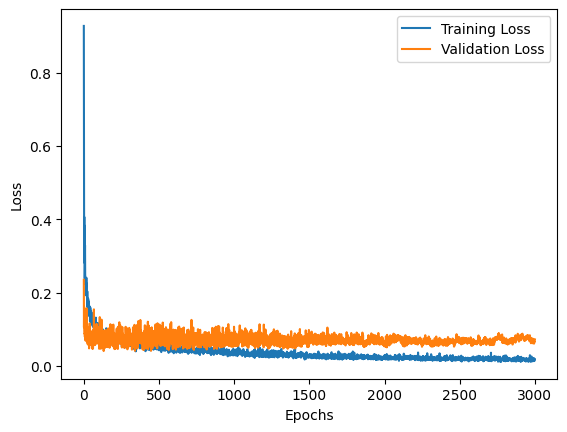

In [47]:
#Training and Validaiton Loss Plots

import matplotlib.pyplot as plt


plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [38]:
#print total losses from the training

print(f"Total Training Loss: {train_losses[-1]:.4f}")
print(f"Total Validation Loss: {val_losses[-1]:.4f}")

Total Training Loss: 0.0152
Total Validation Loss: 0.0726


In [39]:
#evaluating with test dataset


test_result= mlp.forward(test_x,training=False)
actual_predictions = (test_result * y_std) + y_mean
actual_y = (test_y * y_std) + y_mean

In [40]:
loss_function = SquaredError()
test_loss = loss_function.loss(test_result, test_y)

test_loss_value = np.mean(test_loss)
print(f"Test Loss: {test_loss_value:.4f}")

Test Loss: 0.0465


In [46]:
#show predicted values and actual values side by side


for i in range(3,13):
    print(f"Predicted: {actual_predictions[i][0]:.2f}, Actual: {actual_y[i][0]:.2f}")


Predicted: 14.83, Actual: 13.00
Predicted: 19.22, Actual: 21.00
Predicted: 18.32, Actual: 19.40
Predicted: 14.95, Actual: 15.00
Predicted: 15.01, Actual: 15.00
Predicted: 26.98, Actual: 22.30
Predicted: 18.89, Actual: 18.00
Predicted: 27.71, Actual: 27.40
Predicted: 35.02, Actual: 31.90
Predicted: 19.82, Actual: 19.00
